In this project, we perform end-to-end financial analytics on a multi-table e-commerce dataset to understand revenue growth, customer retention, profitability drivers, and future sales forecasting. The goal is to simulate a real-world Financial Operations Analyst role using transactional data.

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Olist dataset.zip to Olist dataset.zip


In [4]:
import zipfile

with zipfile.ZipFile("Olist dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [5]:
import os
os.listdir()


['.config',
 'olist_customers_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_items_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_geolocation_dataset.csv',
 'streamlit_project_files.zip',
 'olist_order_reviews_dataset.csv',
 'Olist dataset.zip',
 'olist_products_dataset.csv',
 'sample_data']

Load Datasets

In [6]:
import pandas as pd

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")


In [7]:
import pandas as pd

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")


Structure

In [8]:
orders.shape
order_items.shape
customers.shape
payments.shape


(103886, 5)

In [9]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Inspect Revenue Table

In [10]:
order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_items.shape


(112650, 7)

Revenue Column

In [12]:
order_items['revenue'] = order_items['price'] + order_items['freight_value']


Merge Orders + Revenue

In [13]:
master_df = orders.merge(order_items, on='order_id', how='inner')


Check Master Table

In [14]:
master_df.head()
master_df.shape


(112650, 15)

Financial Metrics

Convert Date Column

In [15]:
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])


Extract Month & Year

In [16]:
master_df['year'] = master_df['order_purchase_timestamp'].dt.year
master_df['month'] = master_df['order_purchase_timestamp'].dt.month


Calculate Total Revenue

In [17]:
total_revenue = master_df['revenue'].sum()
total_revenue


np.float64(15843553.239999998)

Monthly Revenue Trend

In [18]:
monthly_revenue = master_df.groupby(['year','month'])['revenue'].sum().reset_index()
monthly_revenue.head()


,year,month,revenue
0,2016,9,354.75
1,2016,10,56808.84
2,2016,12,19.62
3,2017,1,137188.49
4,2017,2,286280.62


Proper Time Series Column

In [19]:
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year','month']].assign(day=1))
monthly_revenue = monthly_revenue.sort_values('date')
monthly_revenue.head()


,year,month,revenue,date
0,2016,9,354.75,2016-09-01
1,2016,10,56808.84,2016-10-01
2,2016,12,19.62,2016-12-01
3,2017,1,137188.49,2017-01-01
4,2017,2,286280.62,2017-02-01


Plot Revenue Trend (Financial Chart)

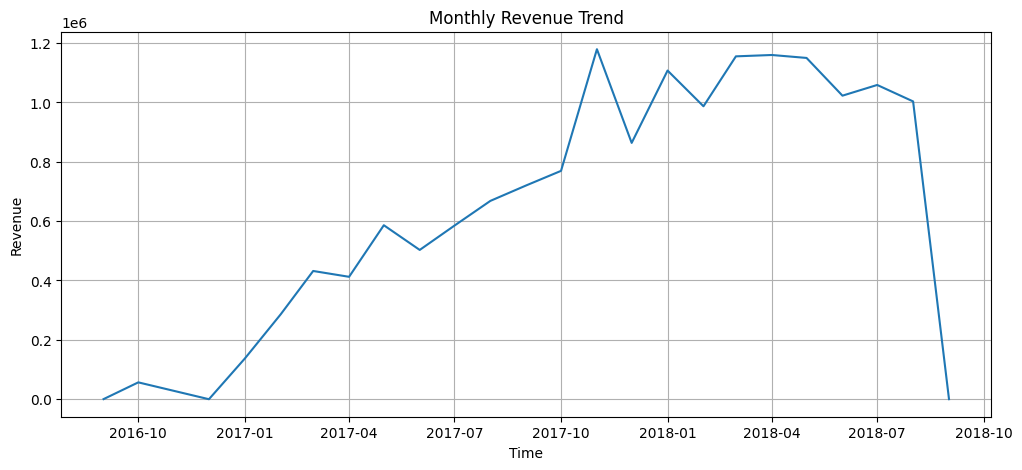

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(monthly_revenue['date'], monthly_revenue['revenue'])

plt.title("Monthly Revenue Trend")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.grid()

plt.show()


Identify Unique Customers

In [21]:
customers_unique = customers['customer_unique_id'].nunique()
customers_unique


96096

Count Orders Per Customer

In [22]:
orders_per_customer = master_df.groupby('customer_id')['order_id'].nunique()
orders_per_customer.head()


,order_id
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
000161a058600d5901f007fab4c27140,1
0001fd6190edaaf884bcaf3d49edf079,1
0002414f95344307404f0ace7a26f1d5,1
000379cdec625522490c315e70c7a9fb,1


In [23]:
customers.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Merge customers into master_df

In [24]:
master_df = pd.merge(
    master_df,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)


In [25]:
master_df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'revenue', 'year', 'month',
       'customer_unique_id'],
      dtype='object')

merged values

In [26]:
master_df[['customer_id','customer_unique_id']].head()


,customer_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


Calculate orders per REAL customer

In [27]:
orders_per_customer = master_df.groupby('customer_unique_id')['order_id'].nunique()
orders_per_customer.head()


,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


Repeat vs One-Time Customers

In [28]:
repeat_customers = (orders_per_customer > 1).sum()
one_time_customers = (orders_per_customer == 1).sum()

repeat_customers, one_time_customers


(np.int64(2913), np.int64(92507))

CHURN RATE %

In [29]:
total_customers = repeat_customers + one_time_customers

churn_rate = (one_time_customers / total_customers) * 100
retention_rate = (repeat_customers / total_customers) * 100

churn_rate, retention_rate


(np.float64(96.94718088451059), np.float64(3.0528191154894153))

PROFITABILITY ANALYTICS

Average Order Value (AOV)

In [30]:
total_orders = master_df['order_id'].nunique()
total_revenue = master_df['revenue'].sum()

average_order_value = total_revenue / total_orders
average_order_value


np.float64(160.57763809214924)

Revenue per Customer

In [31]:
revenue_per_customer = master_df.groupby('customer_unique_id')['revenue'].sum()
revenue_per_customer.describe()


,revenue
count,95420.000000
mean,166.040172
std,228.320333
min,9.590000
25%,63.100000
50%,107.940000
75%,183.220000
max,13664.080000


High Value Customer Segmentation

Identify Top 10% Customers

In [32]:
top_10_threshold = revenue_per_customer.quantile(0.90)

top_customers = revenue_per_customer[revenue_per_customer >= top_10_threshold]

top_customers.count()


np.int64(9553)

Revenue Contribution of Top 10%

In [33]:
top_revenue = top_customers.sum()
total_revenue = revenue_per_customer.sum()

(top_revenue / total_revenue) * 100


np.float64(38.405088668102344)

Revenue Forecasting (Time Series)

Create Monthly Revenue Series

In [34]:
master_df['date'] = pd.to_datetime(master_df['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()


In [35]:
monthly_series = master_df.groupby('date')['revenue'].sum()
monthly_series.head()


,revenue
date,
2016-09-01,354.75
2016-10-01,56808.84
2016-12-01,19.62
2017-01-01,137188.49
2017-02-01,286280.62


Create Date Column in master_df

In [36]:
master_df['date'] = pd.to_datetime(master_df['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()


Now Create Monthly Revenue Series

In [37]:
monthly_series = master_df.groupby('date')['revenue'].sum()
monthly_series.head()


,revenue
date,
2016-09-01,354.75
2016-10-01,56808.84
2016-12-01,19.62
2017-01-01,137188.49
2017-02-01,286280.62


Plot Revenue Time Series

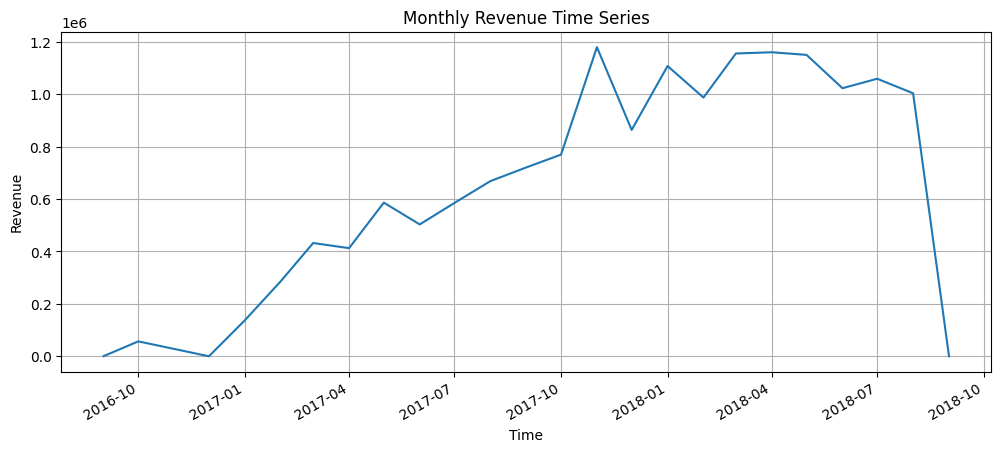

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
monthly_series.plot()

plt.title("Monthly Revenue Time Series")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.grid()

plt.show()


Revenue Forecasting

Check Trend & Seasonality

In [39]:
monthly_series.describe()


,revenue
count,2.400000e+01
mean,6.601481e+05
std,4.174762e+05
min,1.962000e+01
25%,3.808868e+05
50%,6.943018e+05
75%,1.031690e+06
max,1.179144e+06


<Axes: title={'center': 'Revenue Time Series'}, xlabel='date'>

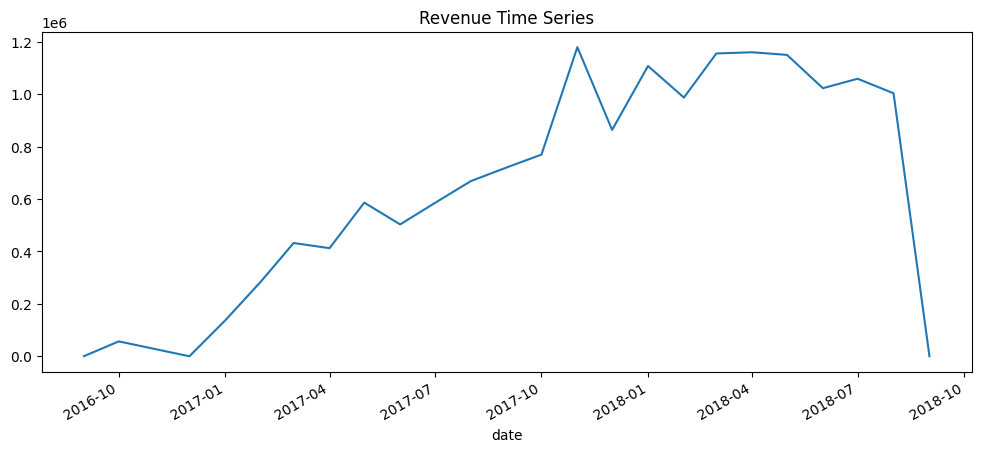

In [40]:
monthly_series.plot(figsize=(12,5), title="Revenue Time Series")


Moving Average

In [41]:
forecast = monthly_series.rolling(window=3).mean()


Plot Forecast vs Actual

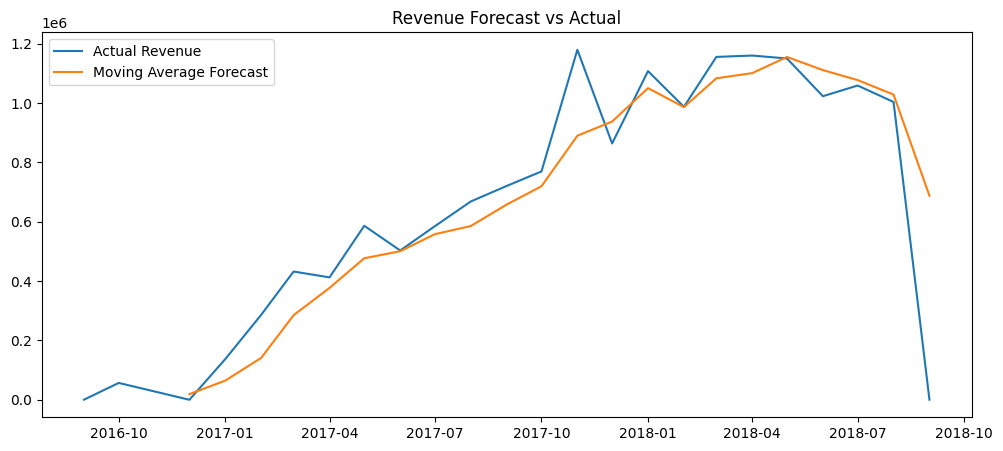

In [42]:
plt.figure(figsize=(12,5))

plt.plot(monthly_series, label='Actual Revenue')
plt.plot(forecast, label='Moving Average Forecast')

plt.title("Revenue Forecast vs Actual")
plt.legend()
plt.show()


Predict Next Month Revenue

In [43]:
next_month_forecast = forecast.iloc[-1]
next_month_forecast


np.float64(687400.9866666667)

In [46]:
monthly_revenue = master_df.groupby('month')['revenue'].sum().reset_index()

monthly_revenue.to_csv("monthly_revenue.csv", index=False)

monthly_revenue.head()

,month,revenue
0,1,1244490.38
1,2,1273189.58
2,3,1587175.41
3,4,1572120.28
4,5,1735972.77


In [47]:
customer_summary = master_df.groupby('customer_unique_id').agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).reset_index()

customer_summary.rename(columns={'order_id':'total_orders'}, inplace=True)

customer_summary.to_csv("customer_summary.csv", index=False)

customer_summary.head()

,customer_unique_id,revenue,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,0000f46a3911fa3c0805444483337064,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,1
